In [9]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torchvision
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Define the transform to convert images to grayscale
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels
    transforms.ToTensor(),  # Convert image to tensor
])

train_dataset = datasets.STL10(root='./data', split='train', download=True, transform=transform)
train2 = datasets.STL10(root='./data',split='train', download=True)
test_dataset = datasets.STL10(root='./data', split='test', download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [20]:
class ColorizationDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Get the image and label from the dataset
        img, label = self.dataset[idx]
        # Return the grayscale image and the original label
        return img, label

# Create the custom datasets
train_colorization_dataset = ColorizationDataset(train_dataset)
test_colorization_dataset = ColorizationDataset(test_dataset)


In [21]:
train_loader = DataLoader(train_colorization_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_colorization_dataset, batch_size=32, shuffle=False)


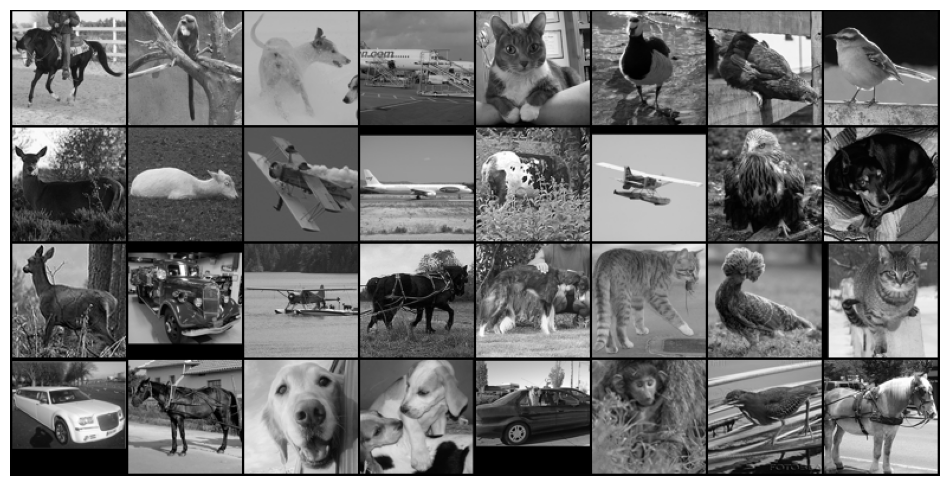

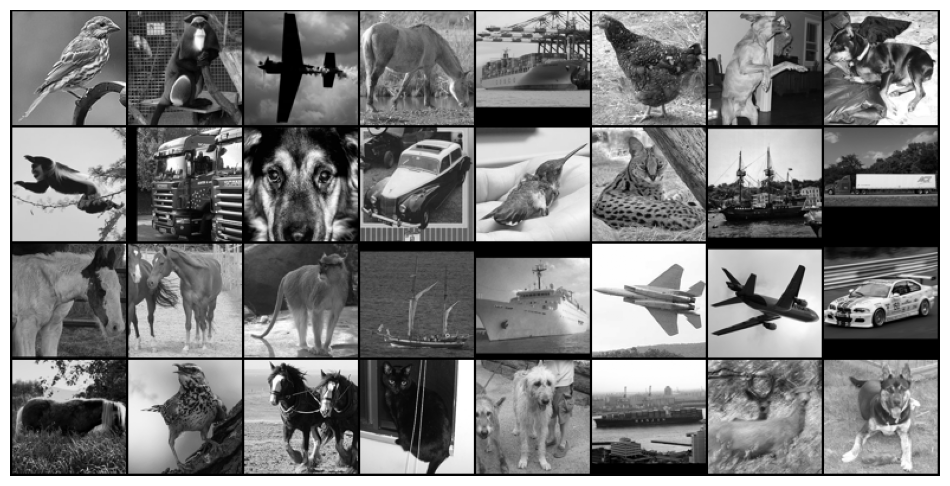

In [22]:
def show_images(loader):
    images, labels = next(iter(loader))
    grid_img = torchvision.utils.make_grid(images, nrow=8)
    plt.figure(figsize=(12, 12))
    plt.imshow(grid_img.permute(1, 2, 0).numpy())
    plt.axis('off')
    plt.show()

# Show images from the training set
show_images(test_loader)
show_images(train_loader)
